Random Forest Accuracy: 0.8792401628222524
Random Forest F1 Score: 0.8781634749072688
Random Forest Precision: 0.8845736833075999
Random Forest Recall: 0.8792401628222524
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       0.87      0.71      0.78       122
           2       0.75      0.89      0.81       118
           3       0.90      0.93      0.92       128
           4       0.93      0.77      0.85       106
           5       0.85      0.94      0.89       131

    accuracy                           0.88       737
   macro avg       0.88      0.87      0.87       737
weighted avg       0.88      0.88      0.88       737



C:\Users\prana\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:158: UserWarning: [11:23:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.9497964721845319
XGBoost F1 Score: 0.9496860480521222
XGBoost Precision: 0.9502114844919539
XGBoost Recall: 0.9497964721845319
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       132
           1       0.90      0.90      0.90       122
           2       0.91      0.90      0.90       118
           3       0.94      1.00      0.97       128
           4       0.99      0.92      0.96       106
           5       0.96      0.96      0.96       131

    accuracy                           0.95       737
   macro avg       0.95      0.95      0.95       737
weighted avg       0.95      0.95      0.95       737



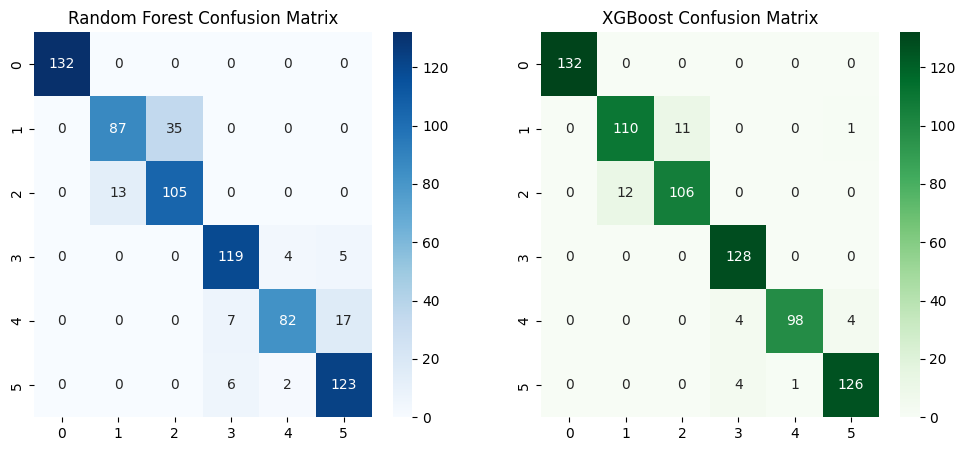

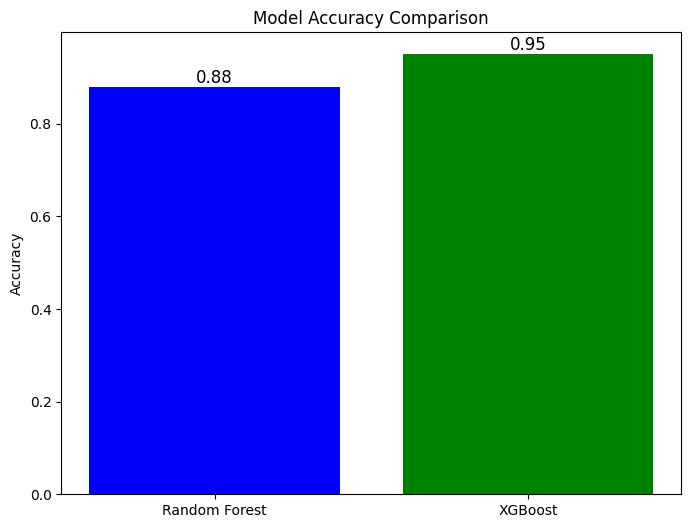

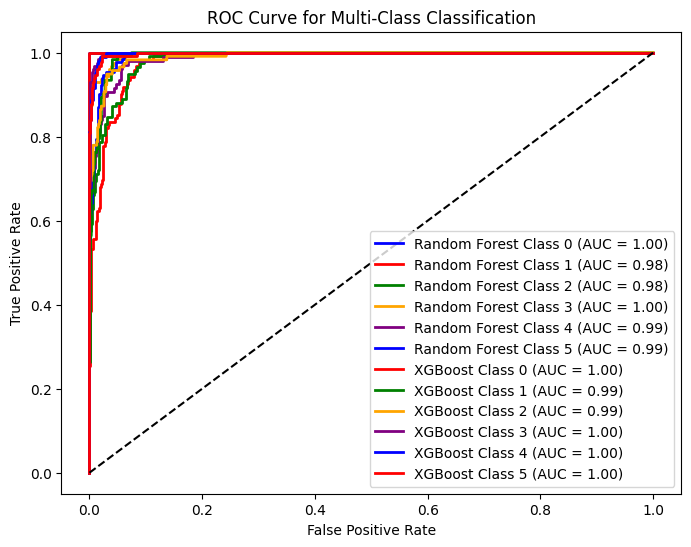

C:\Users\prana\AppData\Local\Temp\ipykernel_4800\686490922.py:117: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rf_important_features.values, y=rf_important_features.index, palette='viridis')


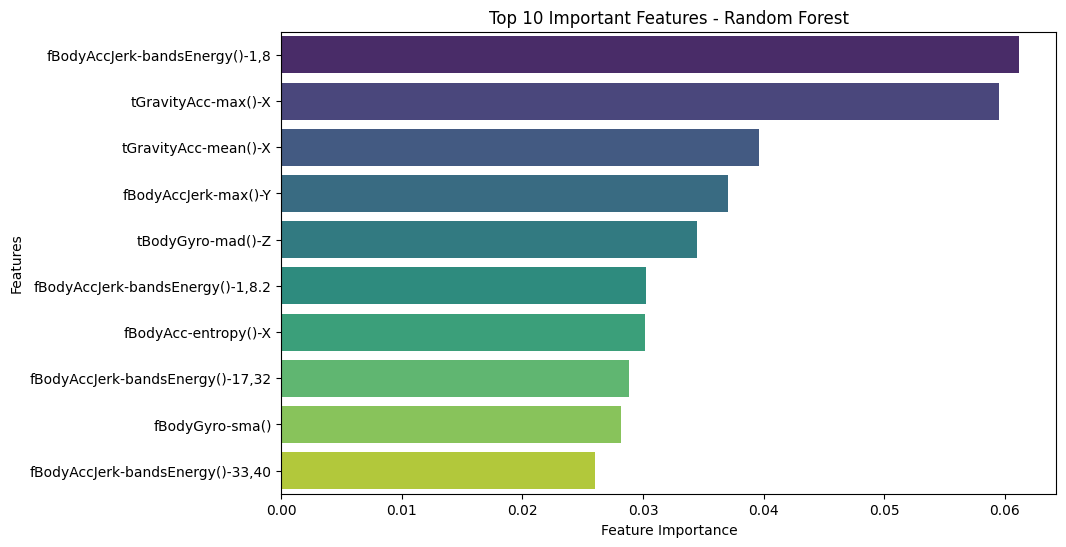

C:\Users\prana\AppData\Local\Temp\ipykernel_4800\686490922.py:126: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=xgb_important_features.values, y=xgb_important_features.index, palette='magma')


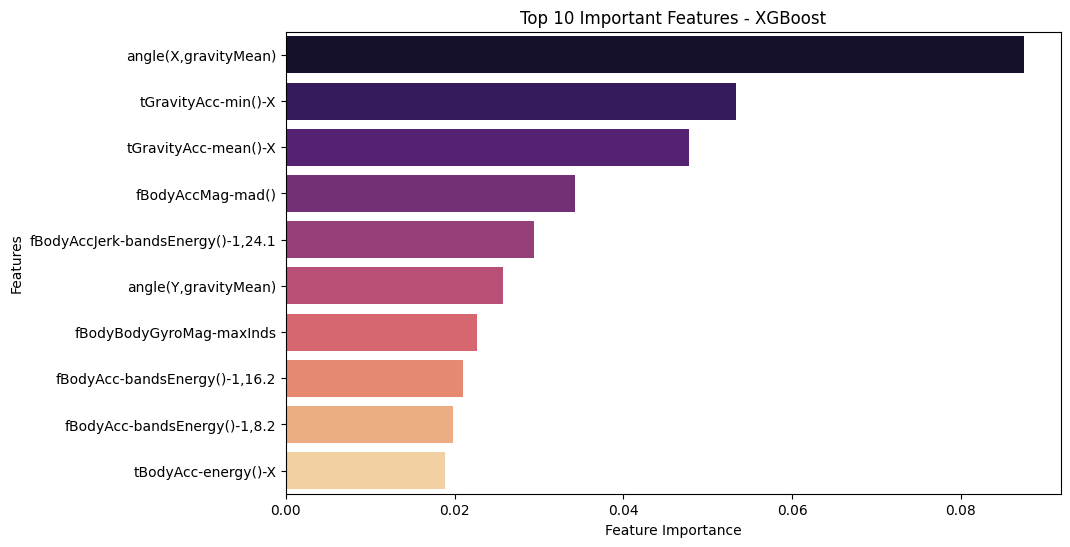

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score, roc_curve, auc, precision_score, recall_score
from sklearn.preprocessing import label_binarize
from itertools import cycle

# Load the dataset from the home directory in Jupyter Notebook
file_path = "test.csv"  # Update to the correct filename if needed
df = pd.read_csv(file_path)

# Check for missing values
df.dropna(inplace=True)

# Encode categorical columns if any
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

# Split features and target (assuming last column is the target)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Standardize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Train Random Forest model 
rf_model = RandomForestClassifier(n_estimators=10, max_depth=5, max_features='log2', random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_preds)
rf_f1 = f1_score(y_test, rf_preds, average='weighted')
rf_precision = precision_score(y_test, rf_preds, average='weighted')
rf_recall = recall_score(y_test, rf_preds, average='weighted')
print("Random Forest Accuracy:", rf_accuracy)
print("Random Forest F1 Score:", rf_f1)
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_preds))

# Train XGBoost model 
xgb_model = XGBClassifier(n_estimators=10, max_depth=3, learning_rate=0.01, 
                          subsample=0.6, colsample_bytree=0.6, 
                          use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
xgb_preds = xgb_model.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_preds)
xgb_f1 = f1_score(y_test, xgb_preds, average='weighted')
xgb_precision = precision_score(y_test, xgb_preds, average='weighted')
xgb_recall = recall_score(y_test, xgb_preds, average='weighted')
print("XGBoost Accuracy:", xgb_accuracy)
print("XGBoost F1 Score:", xgb_f1)
print("XGBoost Precision:", xgb_precision)
print("XGBoost Recall:", xgb_recall)
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_preds))

# Confusion Matrix
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
rf_cm = confusion_matrix(y_test, rf_preds)
xgb_cm = confusion_matrix(y_test, xgb_preds)
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Random Forest Confusion Matrix")
sns.heatmap(xgb_cm, annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("XGBoost Confusion Matrix")
plt.show()

# Plot Accuracy Comparison
models = ['Random Forest', 'XGBoost']
accuracies = [rf_accuracy, xgb_accuracy]
f1_scores = [rf_f1, xgb_f1]

fig, ax = plt.subplots(figsize=(8, 6))
bars = ax.bar(models, accuracies, color=['blue', 'green'])
ax.set_title("Model Accuracy Comparison")
ax.set_ylabel("Accuracy")

# Add accuracy values above bars
for bar, acc in zip(bars, accuracies):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{acc:.2f}', ha='center', va='bottom', fontsize=12)

plt.show()

# ROC Curve for Multi-Class Classification (One-vs-Rest Approach)
y_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_bin.shape[1]
colors = cycle(['blue', 'red', 'green', 'orange', 'purple'])

plt.figure(figsize=(8, 6))
for model, name in zip([rf_model, xgb_model], ["Random Forest", "XGBoost"]):
    y_score = model.predict_proba(X_test)
    for i, color in zip(range(n_classes), colors):
        fpr, tpr, _ = roc_curve(y_bin[:, i], y_score[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, color=color, lw=2, label=f'{name} Class {i} (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve for Multi-Class Classification")
plt.legend()
plt.show()

# Feature Importance for Random Forest
rf_important_features = pd.Series(rf_model.feature_importances_, index=df.columns[:-1]).nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=rf_important_features.values, y=rf_important_features.index, palette='viridis')
plt.title("Top 10 Important Features - Random Forest")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()

# Feature Importance for XGBoost
xgb_important_features = pd.Series(xgb_model.feature_importances_, index=df.columns[:-1]).nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=xgb_important_features.values, y=xgb_important_features.index, palette='magma')
plt.title("Top 10 Important Features - XGBoost")
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.show()
